In [1]:
import numpy as np 
import pandas as pd 
import os
import warnings  
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

**CONTEXT**

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.*

*A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes*
There can be various factors related to occurence to stroke. So using the data given we try to list out the potential factors by using various visualization techniques. 

**READ DATA**

In [2]:
data = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**CHECK FOR NULL VALUES**

In [3]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

*AS WE CAN SEE BMI CONTAINS NULL VALUES AND WE NEED TO FIX THIS*

***FILLING THE NULL VALUES WITH AVERAGE OF THE BMI'S***

In [4]:
data.bmi=(data.bmi.fillna(data['bmi'].mean()))
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

SO NOW NO NULL VALUES PRESENT

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


So from above statistical description of the dataset we can see that mean age of people is around 43 years and mean bmi is more than normal

WHILE PLOTTING WE NEED TO KEEP IN MIND THAT AGAINST WHICH TYPE OF VARIABLES WE ARE PLOTTING THEN ONLY WE CAN DRAW INSIGHT FROM IT

**COUNTPLOT TO SEE THE DISTRIBUTION OF WORK_TYPE**

<AxesSubplot:xlabel='work_type', ylabel='count'>

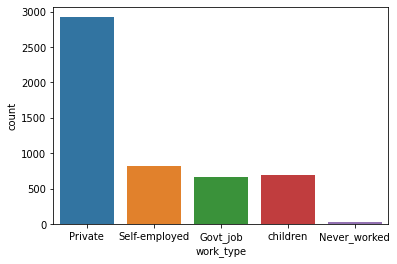

In [7]:
sns.countplot(data['work_type'])

THERE ARE LARGE NUMBER OF PEOPLE WHO WORK ON PRIVATE SECTOR 

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

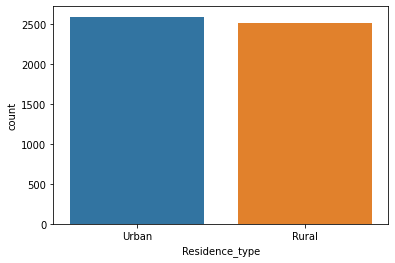

In [8]:
sns.countplot(data['Residence_type'])

THERE ARE ALMOST SAME NUMBER OF PEOPLE LIVING IN BOTH URBAN AND RURAL AREAS

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

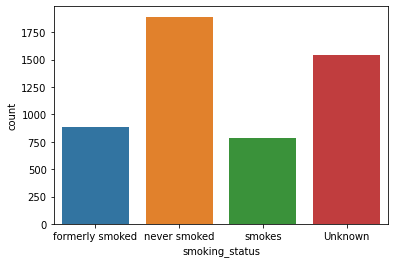

In [9]:
sns.countplot(data['smoking_status'])

GOOD TO SEE THAT MOST NUMBER OF PEOPLE NEVER SMOKED AS "SMOKING KILLS"

<AxesSubplot:xlabel='stroke', ylabel='count'>

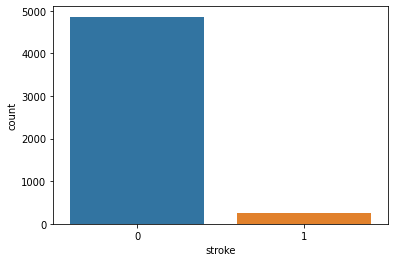

In [10]:
sns.countplot(data['stroke'])

THE ABOVE PLOT SHOWS THAT THERE IS **HIGH IMBALANCE** IN THE BOTH THE TARGET CLASSES AN WE NEED TO RESOLVE THIS ISSUE BEFORE APPLYING ANY ALGORITHM

<AxesSubplot:xlabel='ever_married', ylabel='count'>

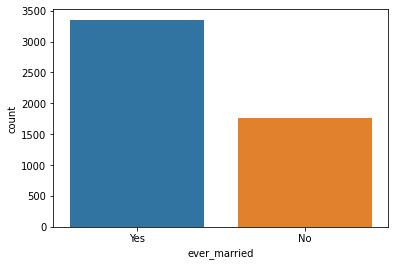

In [11]:
sns.countplot(data['ever_married'])

In [12]:
min_avg_glucose_level = min(data.avg_glucose_level)
max_avg_glucose_level = max(data.avg_glucose_level)
print(min_avg_glucose_level)
print(max_avg_glucose_level)

55.12
271.74


THE ABOVE MINIMUM AND MAXIMUM VALUES OF AVERAGE GLUCOSE LEVEL SHOWS THAT THE COLUMN NEEDS TO BE STANDARDIZED AS THERE IS VERY HIGH DIFFERENCE BETWEEN THEM

<AxesSubplot:xlabel='age', ylabel='Density'>

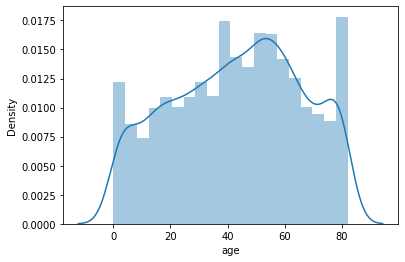

In [13]:
sns.distplot(data['age'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

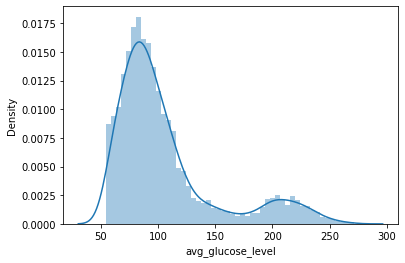

In [14]:
sns.distplot(data['avg_glucose_level'])

**MAPPING OF CATEGORICAL VARIABLES**

In [15]:
data['work_type'] = data['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})
data['gender'] = data['gender'].map({'Male':0, 'Female':1})
data['Residence_type'] = data['Residence_type'].map({'Urban':0, 'Rural':1})
data['smoking_status'] = data['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
data['ever_married'] = data['ever_married'].map({'Yes':0, 'No':1})

DATASET AFTER MAPPING OF CATEGORICAL VARIABLES

In [16]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.0,67.0,0,1,0,0,0,228.69,36.600000,0,1
1,51676,1.0,61.0,0,0,0,1,1,202.21,28.893237,1,1
2,31112,0.0,80.0,0,1,0,0,1,105.92,32.500000,1,1
3,60182,1.0,49.0,0,0,0,0,0,171.23,34.400000,2,1
4,1665,1.0,79.0,1,0,0,1,1,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.0,80.0,1,0,0,0,0,83.75,28.893237,1,0
5106,44873,1.0,81.0,0,0,0,1,0,125.20,40.000000,1,0
5107,19723,1.0,35.0,0,0,0,1,1,82.99,30.600000,1,0
5108,37544,0.0,51.0,0,0,0,0,1,166.29,25.600000,0,0


**CORRELATION HEATMAP** TO CHECK FOR ANY CORRELATION BETWEEN VARIABLES

<AxesSubplot:>

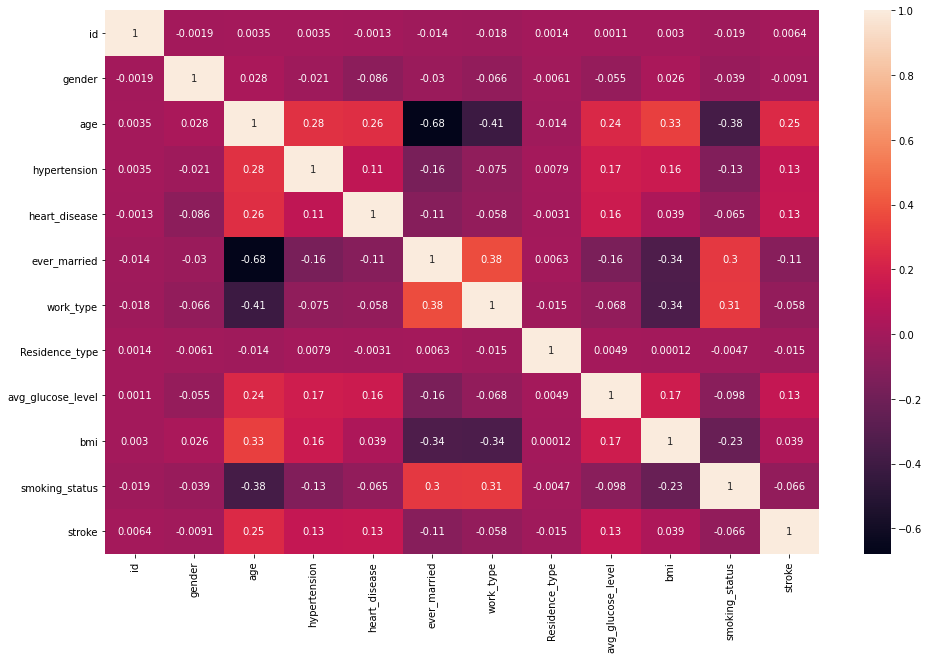

In [17]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(method='pearson'), annot=True)

FROM THE ABOVE FIGURE WE CAN SEE THAT-
WORK_TYPE AND BMI - NEGATIVE CORRELATION
STROKE AND AGE HAS A POSITIVE CORRELATION
SIMILARLY MANY OTHER VARIABLES HAVE SUCH CORRELATION VALUES WE CANNOT REMOVE ANY VARIABLES. WE HAVE TO CONSIDER ALL THE VARIABLES FOR OUR MODEL

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

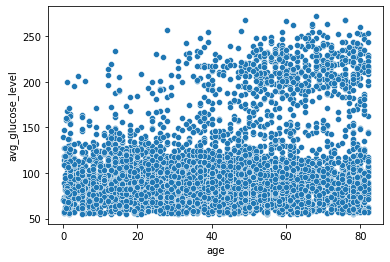

In [18]:
sns.scatterplot(x=data['age'], y=data['avg_glucose_level'])

FROM THE ABOVE SCATTER PLOT IT IS QUITE VISIBLE THAT AS THE AGE INCREASE IT LEADS TO INCREASE IN GLUCOSE LEVEL

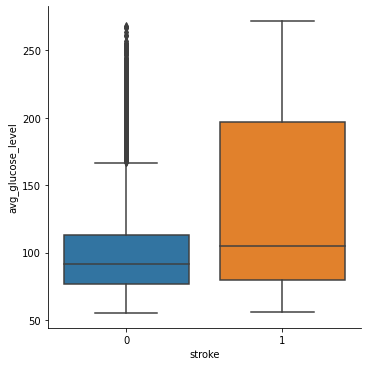

In [19]:
sns.catplot(x='stroke', y="avg_glucose_level", kind="box", data=data)

PEOPLE HAVING HIGHER GLUCOSE LEVEL ARE AT HIGH RISK OF STROKE

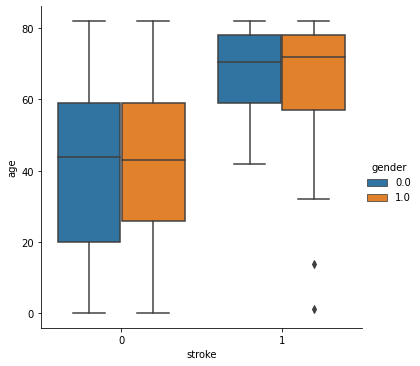

In [20]:
sns.catplot(x='stroke', y="age", hue = 'gender', kind="box", data=data)

HIGH AGE FEMALES ARE AT THE RISK TO STROKE

**APPLY MACHINE LEARNING ALGORITHM FOR PREDICTION**

DIVIDING THE DATASET INTO FEATURES AND LABELE

In [21]:
X = data.drop('stroke',axis=1)
y = data['stroke']

ONCE AGAIN CHECK FOR NULL VALUES IN THE DATASET

In [22]:
X.isnull().sum() #WE STILL HAVE 1 NULL VALUE IN THE GENDER COLUMN

id                   0
gender               1
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [23]:
X.gender=(X.gender.fillna(1))
X.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

SINCE THE TARGET CLASS IS HIGHLY IMBALANCED, WE NEED TO TREAT IT AS IT'S PRESENCE WILL LEAD TO POOR PERFORMANCE OF THE MODEL. HERE I HAVE USED SMOTE (Synthetic Minority Oversampling Technique) TECHNIQUE. SMOTE WORKS BY RANDOMNLY PICKING A POINT FROM MINORITY CLASS AND COMPUTING A K-NEAREST NEIGHBOURS FOR THIS POINT.

**TREATING IMBALANCE CLASS USING SMOTE**

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)

SPLITTING OF DATASET INTO TRAIN AND TEST

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.33,random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
X_train = X_train.drop(columns=['id'])
X_test = X_test.drop(columns=['id'])

STANDARDIZATION OF THE DATA IS REQUIRED AS DATA ARE IN DIFFERENT SCALES

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**XGBOOST CLASSIFIER**

In [27]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train,y_train)

[12:34:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
y_pred1 = model.predict(X_test)
roc_auc_score(y_test, y_pred1)

0.9426682360102235

WOW!! AUC SCORE INCREASED

In [30]:
cm = confusion_matrix(y_test, y_pred1)
cm

array([[771,  32],
       [ 60, 742]])

In [31]:
tn = cm[0,0]
fp = cm[0,1]
tp = cm[1,1]
fn = cm[1,0]
accuracy  = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall    = tp / (tp + fn)
f1score  = 2 * precision * recall / (precision + recall)
print(f1score)

0.9416243654822334


AMAZING F1 SCORE

In [32]:
predicted_probab = model.predict_proba(X_test)
predicted_probab = predicted_probab[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab)

**ROC CURVE**

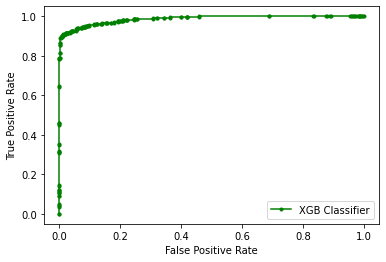

In [33]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', color='green',label='XGB Classifier')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

### Using the model in real time


In [36]:
test=pd.DataFrame()
test['gender']=[input("Enter your gender. 0 for male and 1 for female")]
test['age']=[input('Enter your age:',)]
test['hypertension']=[input('If you have hypertension,enter 1 and if not enter 0',)]
test['heart_disease']=[input('If you have heart disease, press 1 and if not press 0',)]
test['ever_married']=[input('If you are married, press 0 and if not press 1',)]
test['work_type']=[input('If you work in private,press 0, if self employed press 1, if in Govt job press 2.If you are children press 3 and if you are not employed press 4',)]
test['Residence_type']=[input('If you live in urban press 0, if in rural then enter 1')]
test['avg_glucose_level']=[input('Enter your average glucose level:',)]
test['bmi']=[input('Enter your BMI here:')]
test['smoking_status']=[input('If you smoke formerly, press 0. If you never smoke press 1 and if you smoke,press 2' )]
test1 = sc.transform(test)
y = model.predict(test1)
if y == [0]:
    print('You are out of danger from getting a heart stroke')
else :
    print('You are at the risk of getting a stroke')

Enter your gender. 0 for male and 1 for female 1
Enter your age: 78
If you have hypertension,enter 1 and if not enter 0 0
If you have heart disease, press 1 and if not press 0 1
If you are married, press 0 and if not press 1 0
If you work in private,press 0, if self employed press 1, if in Govt job press 2.If you are children press 3 and if you are not employed press 4 0
If you live in urban press 0, if in rural then enter 1 1
Enter your average glucose level: 175.26
Enter your BMI here: 40.2
If you smoke formerly, press 0. If you never smoke press 1 and if you smoke,press 2 2


You are out of danger from getting a heart stroke


Saving the model

In [ ]:
# model.save_model("my_model.json")